In [ ]:
import numpy as np
data1 = np.genfromtxt('/content/drive/MyDrive/OpScan/120DegreeHexPan03-1.csv', delimiter=',')
data2 = np.genfromtxt('/content/drive/MyDrive/OpScan/120DegreeHexPan03-2.csv', delimiter=',')
data = np.concatenate((data1, data2), axis=0)
data = data[1:,:] # remove the first row

KeyboardInterrupt: ignored

In [ ]:
import numpy as np
# z=0.138673(x^2+y^2)
data = np.genfromtxt('/content/drive/MyDrive/OpScan/0DegreeHexPan03.csv', delimiter=',')
data = data[1:,:] # remove the first row

In [ ]:
import pandas as pd
data = pd.read_csv('/content/drive/MyDrive/OpScan/HexPanel03.asc',sep = r'\s+', engine='python', header=1)

In [ ]:
data[0:-2]

2.962981   80.329720  -27.665979
0        3.118088   80.335052  -27.687822
1        3.271610   80.343964  -27.714256
2        3.444074   80.309700  -27.685249
3        3.596446   80.321144  -27.714926
4        3.747643   80.335258  -27.748024
...           ...         ...         ...
816743  34.254101  -78.773506    1.813723
816744  34.374149  -78.758194    1.783247
816745  33.893097  -78.929825    1.846112
816746  34.023872  -78.930672    1.852535
816747  34.277428  -78.920387    1.838046

[816748 rows x 3 columns]

In [ ]:
data, np.min(data, axis=0), np.max(data, axis=0)

(         2.962981   80.329720  -27.665979
 0        3.118088   80.335052  -27.687822
 1        3.271610   80.343964  -27.714256
 2        3.444074   80.309700  -27.685249
 3        3.596446   80.321144  -27.714926
 4        3.747643   80.335258  -27.748024
 ...           ...         ...         ...
 816745  33.893097  -78.929825    1.846112
 816746  34.023872  -78.930672    1.852535
 816747  34.277428  -78.920387    1.838046
 816748  34.397747  -78.905518    1.808588
 816749      **end     cloud**         NaN
 
 [816750 rows x 3 columns],
 2.962981          **end
 80.329720     -0.000201
 -27.665979   -30.528183
 dtype: object,
 2.962981      9.999635
 80.329720      cloud**
 -27.665979    5.117711
 dtype: object)

In [ ]:
# define the fitting function from the point cloud, with translation and rotation
def func(data, rx, ry, rz, tx, ty, tz):

    data = data + np.array([tx, ty, tz])
    # the 3D rotational
    Rz = np.array([[np.cos(rz), -np.sin(rz), 0],
                     [np.sin(rz), np.cos(rz), 0],
                        [0, 0, 1]])
    Ry = np.array([[np.cos(ry), 0, np.sin(ry)],
                        [0, 1, 0],
                        [-np.sin(ry), 0, np.cos(ry)]])
    Rx = np.array([[1, 0, 0],
                        [0, np.cos(rx), -np.sin(rx)],
                        [0, np.sin(rx), np.cos(rx)]])
    R = np.dot(Rz, np.dot(Ry, Rx))  # the 3D rotational matrix
    # the 3D translation vector
    T = np.array([[tx], [ty], [tz]])
    # the 3D transformation
    # each row is a point, do the matrix multiplication
    P = np.dot(R, data.T)
    P = P.T
    height = -0.001*(P[:,0]**2 + P[:,1]**2)+tz
    return height


In [ ]:
# use the scipy.optimize.curve_fit to fit the data
import scipy.optimize as opt

# initial guess of the parameters
rx, ry, rz = np.pi*0, 0, 0
tx, ty, tz =  -50, 0, 0
A = 0.001
# fitting
popt, pcov = opt.curve_fit(func, data, data[:,2], p0=[rx, ry, rz, tx, ty, tz],
                           bounds= ([-np.pi/2, -np.pi/3, -np.pi/3, -np.inf, -np.inf, -100],
                                    [np.pi/2, np.pi/3, np.pi/3, np.inf, np.inf, 100]))


InvalidIndexError: ignored

In [ ]:
print("x-rotation (in rad): ", popt[0])
print("y-rotation (in rad): ", popt[1])
print("z-rotation (in rad): ", popt[2])
print("x-translation: ", popt[3])
print("y-translation: ", popt[4])
print("z-translation: ", popt[5])
#print("magnitude: ", popt[6])

x-rotation (in rad):  -0.34151036678166197
y-rotation (in rad):  0.11099938325799023
z-rotation (in rad):  -0.3834387437951684
x-translation:  -9.016685483530793
y-translation:  -262.04298452071504
z-translation:  60.6778921367598


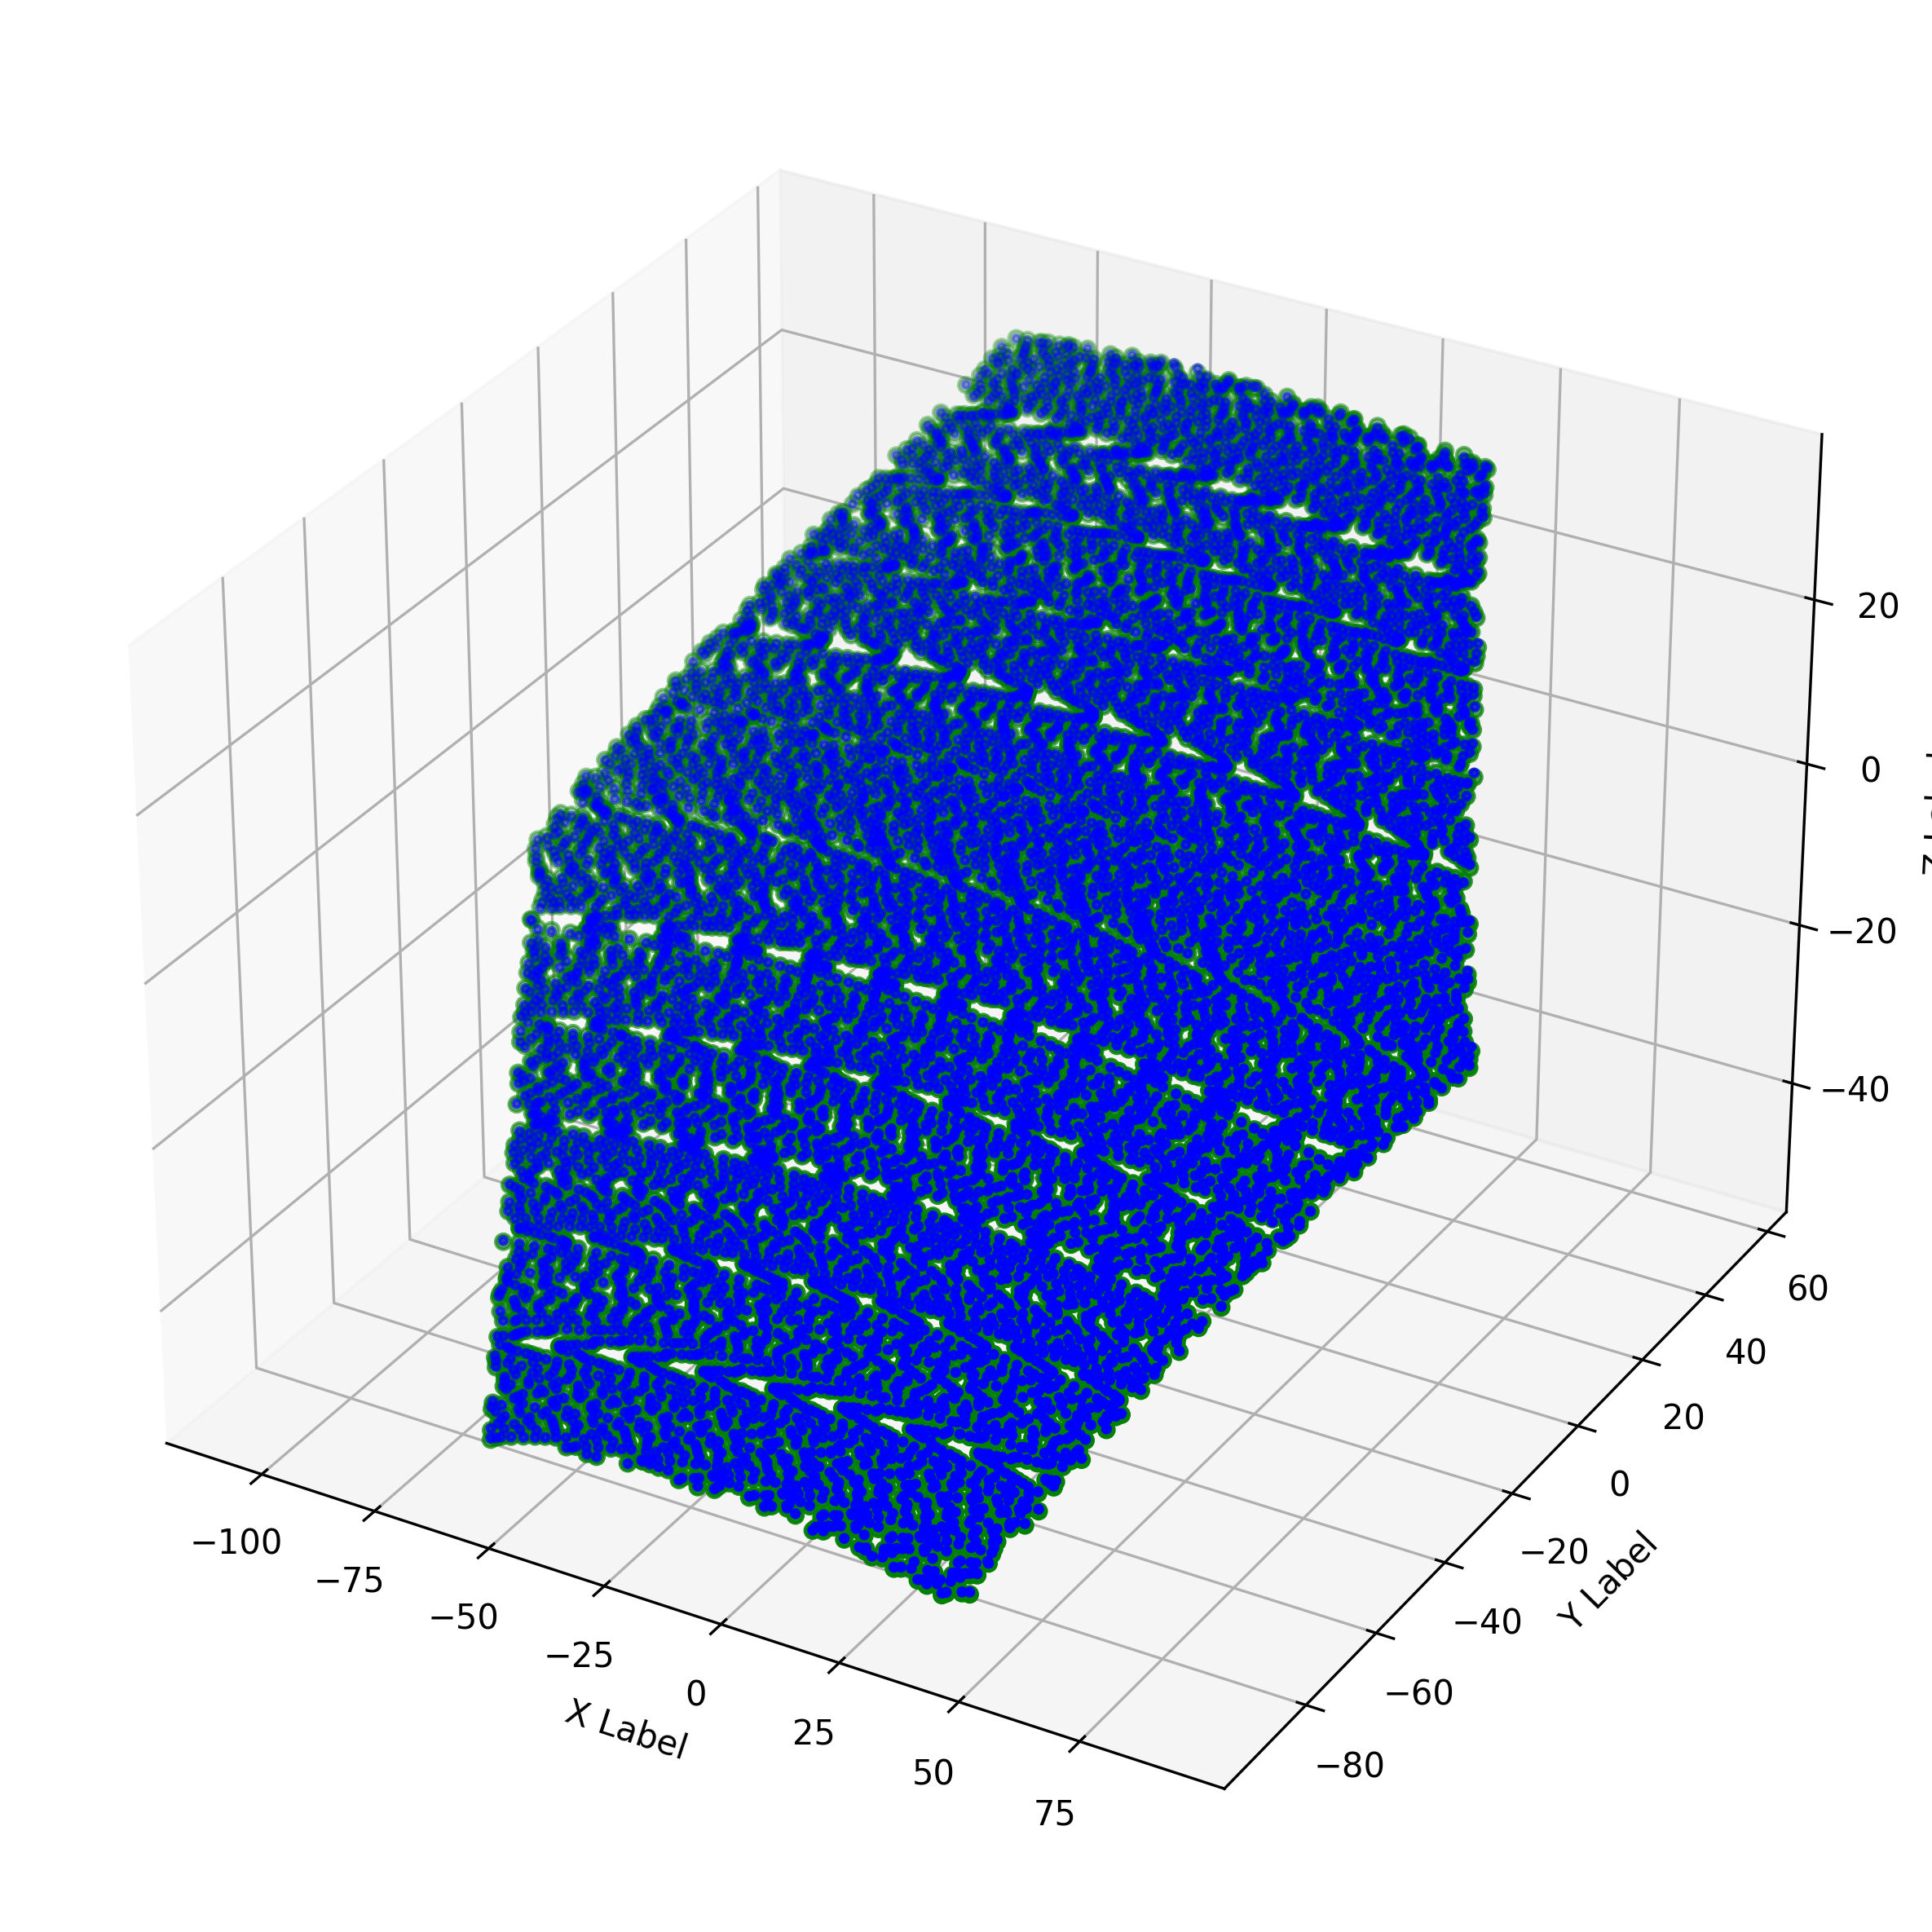

In [ ]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

desample_step = 100
fig = plt.figure(figsize=(10,10), dpi=300)
ax = fig.add_subplot(111, projection='3d')
ax.scatter(data[::desample_step,0], data[::desample_step,1], data[::desample_step,2], c='g', marker='o')
ax.scatter(data[::desample_step,0], data[::desample_step,1], func(data[::desample_step,:], *popt), c='b', marker='.')
ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')
plt.show()


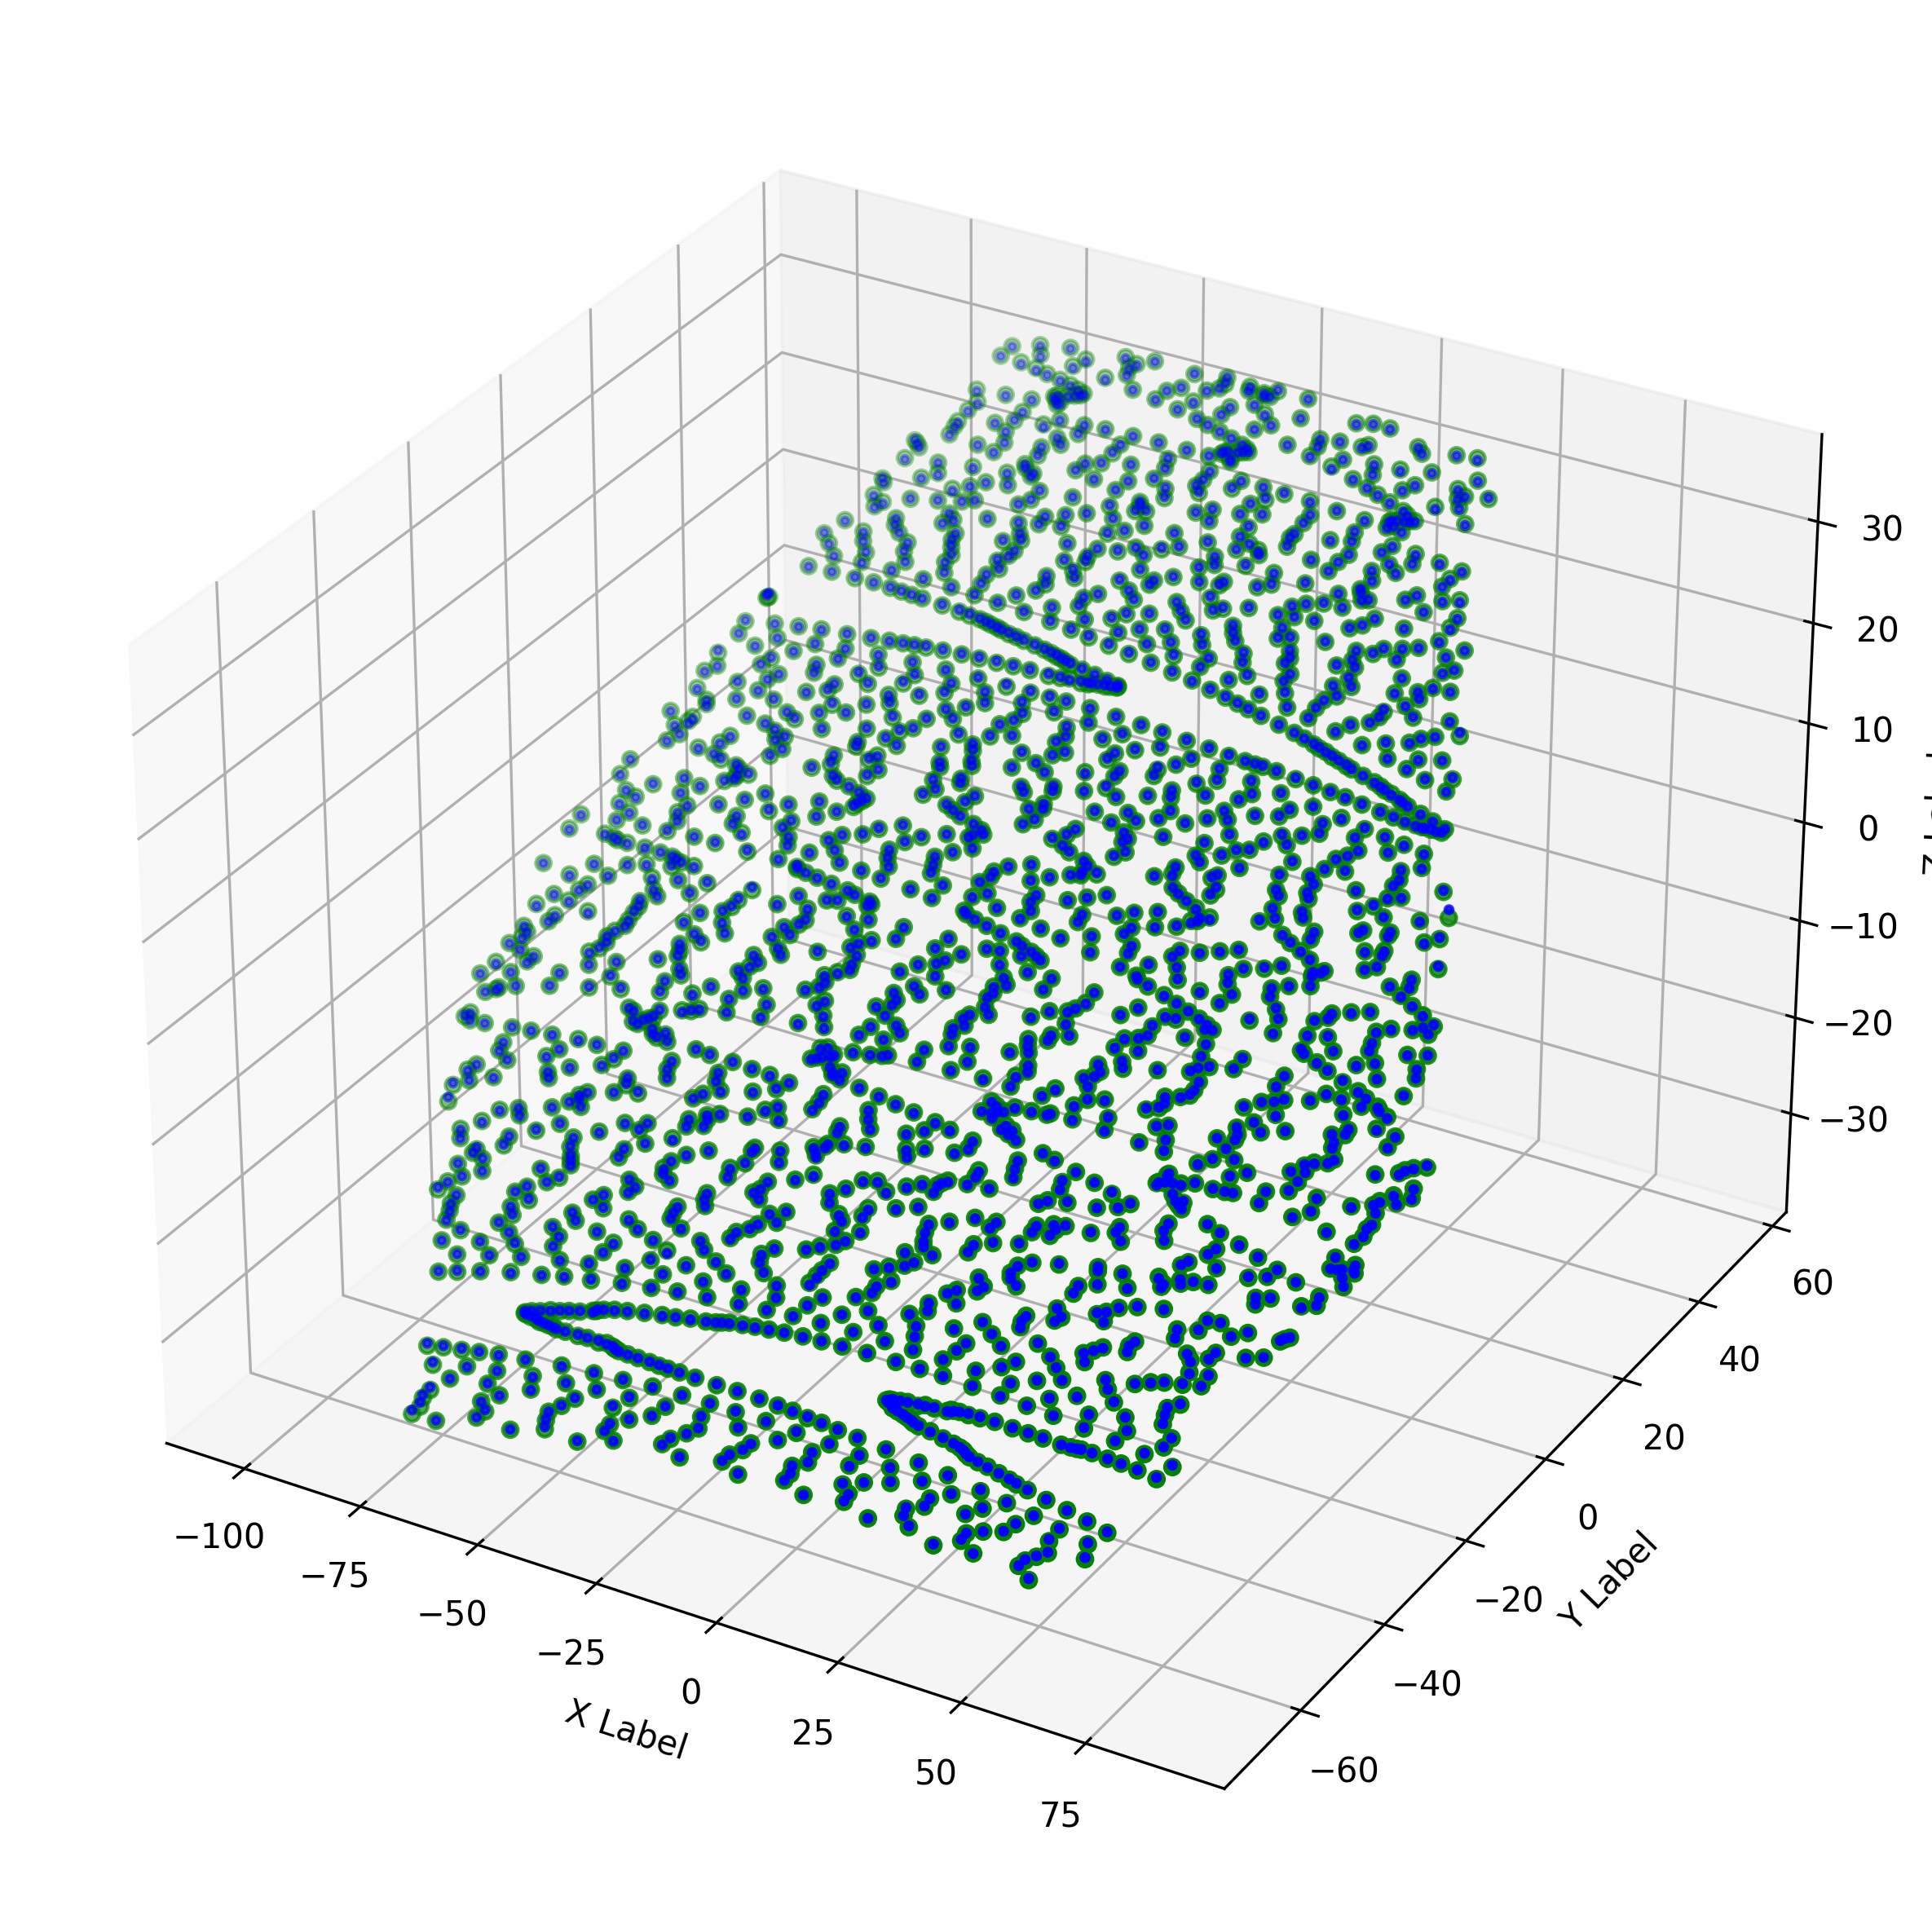

In [ ]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

desample_step = 500
fig = plt.figure(figsize=(10,10), dpi=300)
ax = fig.add_subplot(111, projection='3d')
ax.scatter(data[::desample_step,0], data[::desample_step,1], data[::desample_step,2], c='g', marker='o')
ax.scatter(data[::desample_step,0], data[::desample_step,1], func(data[::desample_step,:], *popt), c='b', marker='.')
ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')
plt.show()


In [ ]:
RMSE = np.sqrt(np.mean((data[:,2]-func(data, *popt))**2))
print(f"RMSE:{RMSE}")



RMSE:0.09457421719740669


In [ ]:
# 2D plot for the residual, color coded
# interpolate the data
from scipy.interpolate import griddata
import matplotlib.pyplot as plt

# define grid.
xi = np.linspace(np.min(data[:,0]),np.max(data[:,0]),1000)
yi = np.linspace(np.min(data[:,1]),np.max(data[:,1]),1000)
# grid the data
zi = griddata((data[:,0], data[:,1]), data[:,2]-func(data[:,:], *popt), (xi[None,:], yi[:,None]), method='linear')



<function matplotlib.pyplot.show(close=None, block=None)>

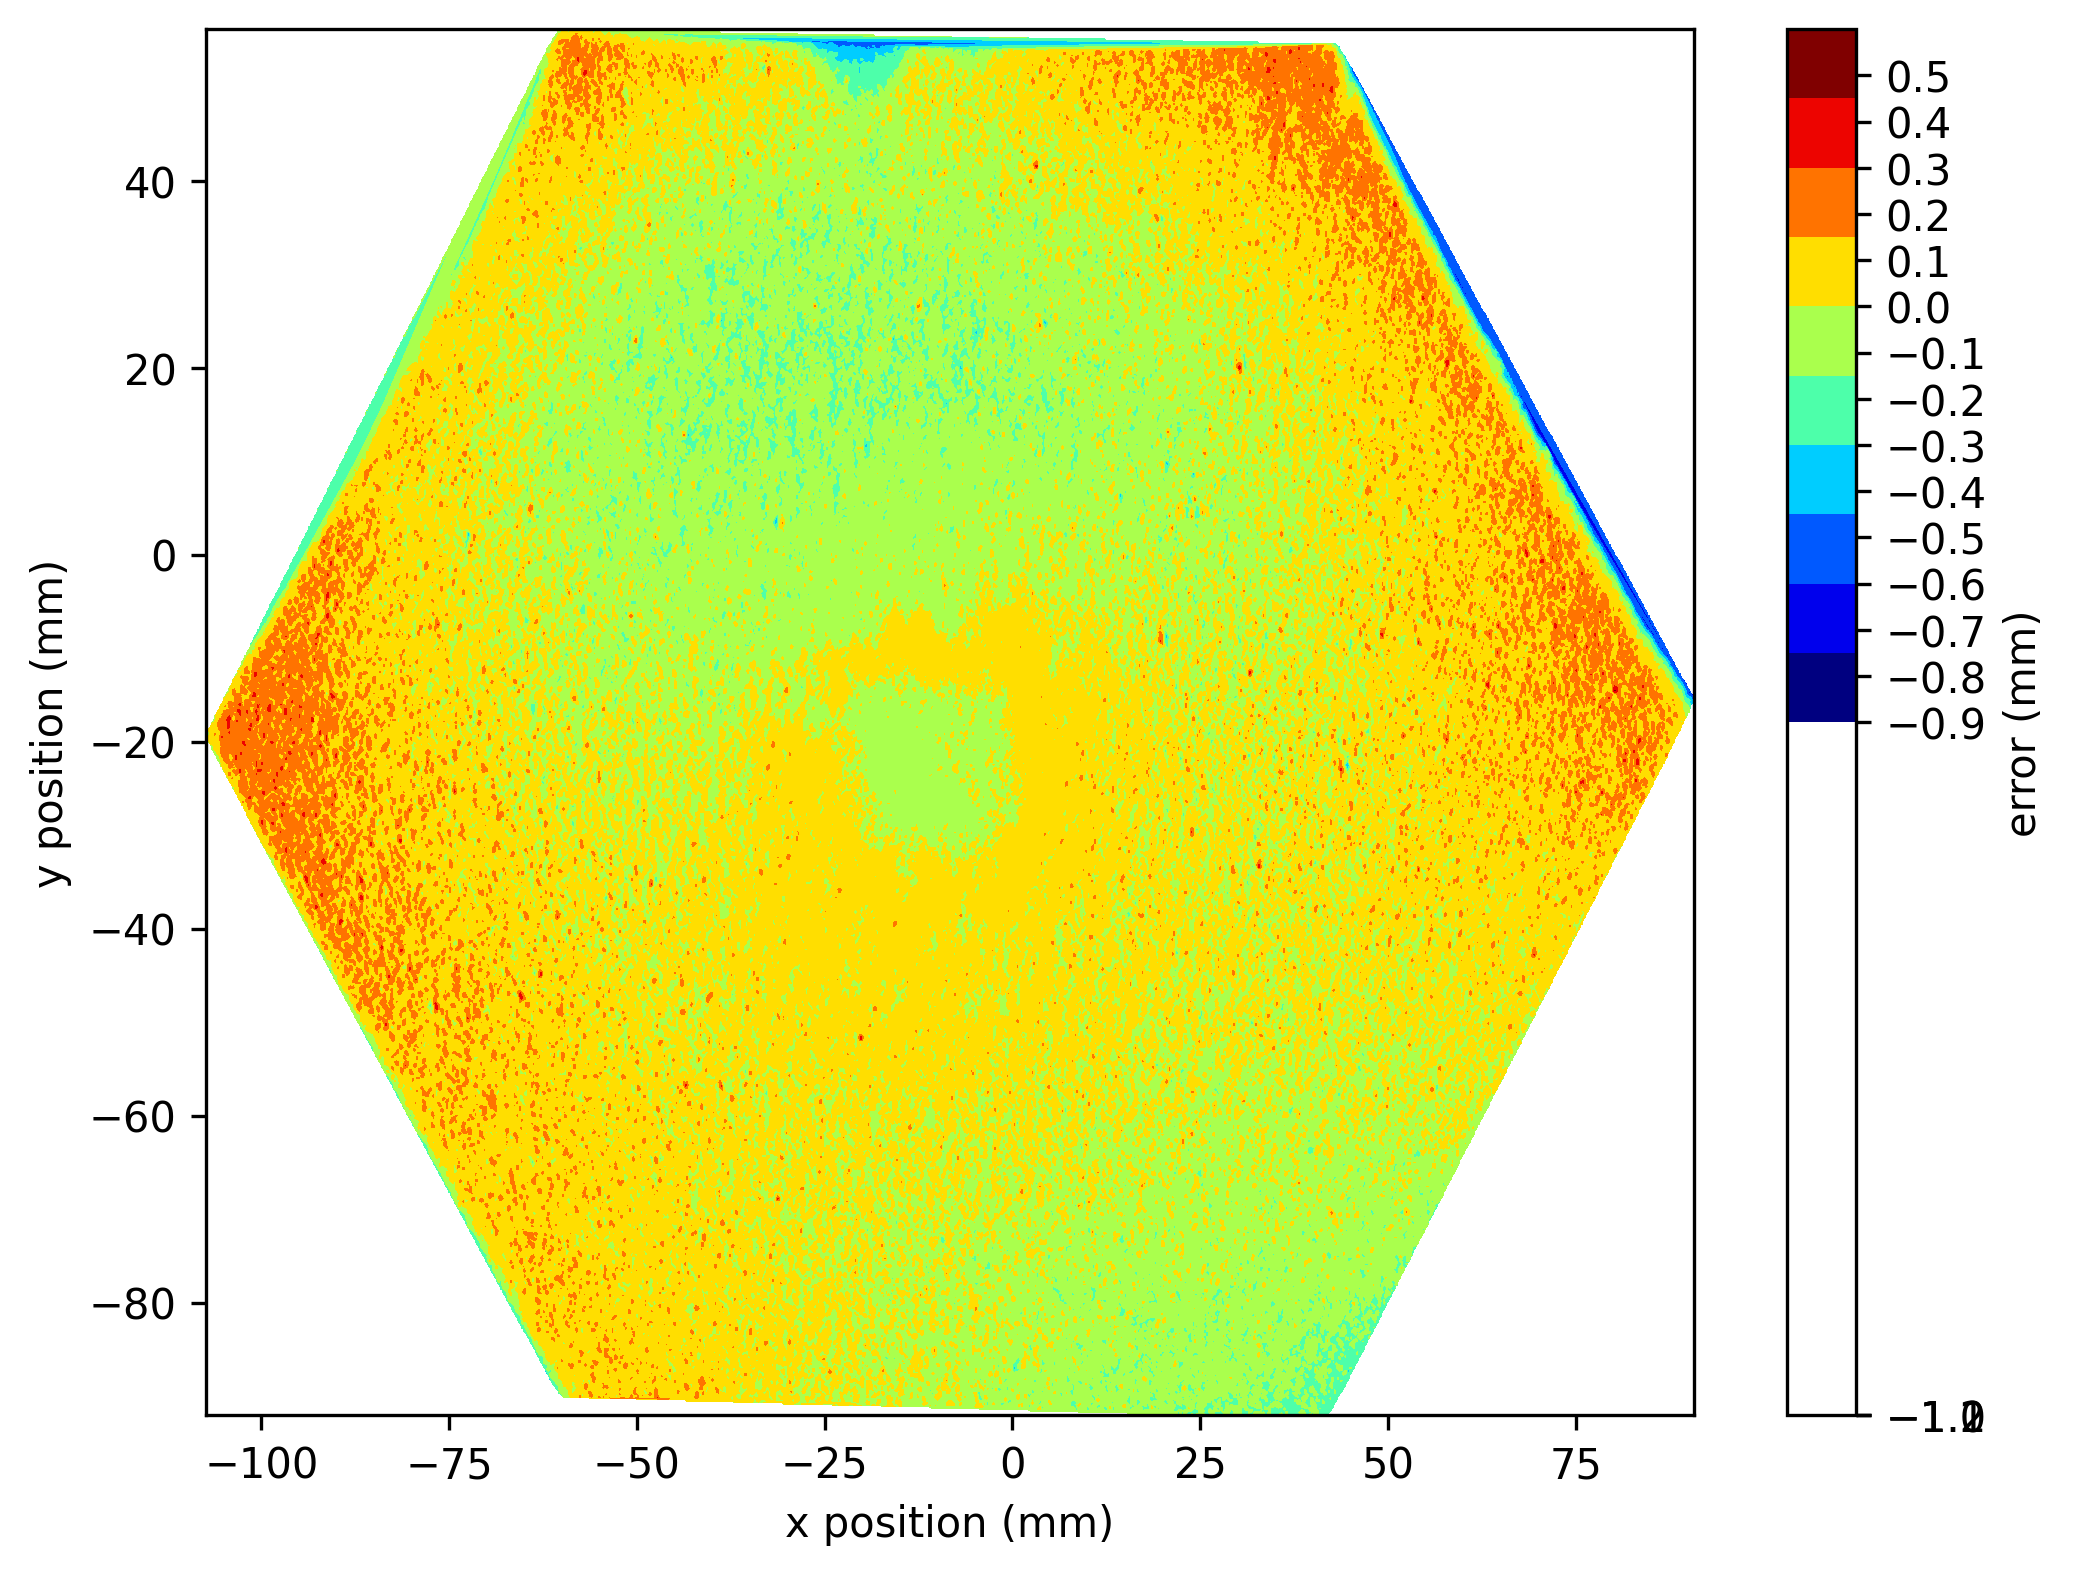

In [ ]:
plt.figure(figsize=(8,6), dpi=300)
# contour the gridded data, plotting dots at the nonuniform data points.
CS = plt.contourf(xi,yi,zi,10,vmin=-0.8, vmax= 0.5, cmap=plt.cm.jet,extend='neither')
# add colorbar title
cbar = plt.colorbar()
cbar.ax.set_ylabel('error (mm)')
cbar.set_ticks([-1.2,-1.1,-1.0,-0.9,-0.8,-0.7,-0.6,-0.5,-0.4,-0.3,-0.2,-0.1,0,0.1,0.2,0.3,0.4,0.5])

plt.xlim(np.min(data[:,0]), np.max(data[:,0]))
plt.ylim(np.min(data[:,1]), np.max(data[:,1]))
plt.xlabel('x position (mm)')
plt.ylabel('y position (mm)')
plt.show

In [ ]:
# Mount Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
# Unmount Drive
from google.colab import drive
drive.flush_and_unmount()

Drive not mounted, so nothing to flush and unmount.


In [ ]:
import numpy as np
x_values = data[:,0]
y_values = data[:,1]
z_values = data[:,2]
xy_values = np.column_stack((x_values,y_values))
#z_values = func(xy_values,*popt)
#print(f"{z_values}")
#print(f"{x_values}")
print(f"{P}")


NameError: ignored

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


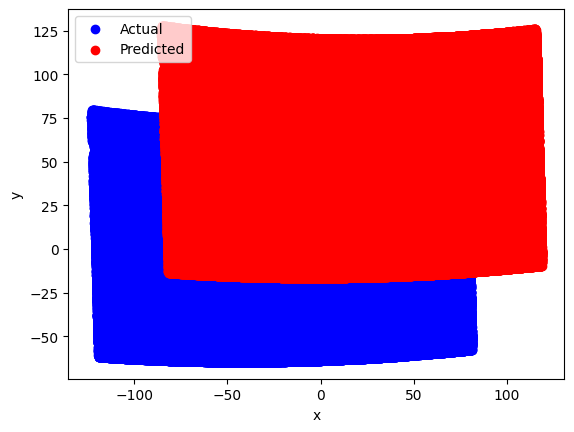

In [ ]:

predicted_z = func(data, *popt)
predicted_x = data[:, 0] + popt[3]
predicted_y = data[:, 1] + popt[4]
x_error = data[:,0] - predicted_x
y_error = data[:,1] - predicted_y

from sklearn.metrics import mean_squared_error
rmse_xy = np.sqrt(mean_squared_error(data[:, :2], np.column_stack((predicted_x, predicted_y))))

import matplotlib.pyplot as plt
fig, ax = plt.subplots()
ax.scatter(data[:, 0], data[:, 1], c='b', label='Actual')
ax.scatter(predicted_x, predicted_y, c='r', label='Predicted')
#ax.scatter(x_error, y_error, c='g', label='Error')
ax.legend()
ax.set_xlabel('x')
ax.set_ylabel('y')
plt.show()